In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [2]:
pData=pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
print(pData.shape)

(235795, 56)


In [3]:
pData.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
pData.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [5]:
pData.label.value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [6]:
x=pData.drop(["label"],axis=1)
y=pData["label"]

In [7]:
x.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,1,0,0,1,34,20,28,119,0,124
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,0,1,50,9,8,39,0,217
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,0,1,10,2,7,42,2,5
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,0,1,1,1,3,27,15,22,1,31
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,1,0,1,244,15,34,72,1,85


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
xTrain.shape, yTrain.shape

((188636, 55), (188636,))

In [11]:
xTest.shape,yTest.shape

((47159, 55), (47159,))

random forest classifier

In [12]:
# Check for non-numeric columns in the dataset
print(xTrain.dtypes)


FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [13]:
print(xTrain.columns)


Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
xTrain['URL'] = label_encoder.fit_transform(xTrain['URL'])
xTrain['Domain'] = label_encoder.fit_transform(xTrain['Domain'])
xTrain['TLD'] = label_encoder.fit_transform(xTrain['TLD'])
xTrain['Title'] = label_encoder.fit_transform(xTrain['Title'])


In [15]:
for column in xTrain.select_dtypes(include=['object']).columns:
    xTrain[column] = label_encoder.fit_transform(xTrain[column])


In [16]:
print(xTrain.dtypes)


FILENAME                        int64
URL                             int64
URLLength                       int64
Domain                          int64
DomainLength                    int64
IsDomainIP                      int64
TLD                             int64
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [17]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(n_estimators=5000) 
Model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=5000)

In [21]:
print(xTest.select_dtypes(include='object').columns)


Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')


In [22]:
for column in xTrain.select_dtypes(include=['object']).columns:
    xTrain[column] = label_encoder.fit_transform(xTrain[column])

In [24]:
from sklearn.preprocessing import LabelEncoder

for col in xTrain.select_dtypes(include='object').columns:
    le = LabelEncoder()
    xTrain[col] = le.fit_transform(xTrain[col])
    xTest[col] = le.transform(xTest[col])


In [30]:
# Combine train and test to ensure aligned one-hot encoding
combined = pd.concat([xTrain, xTest], keys=['train', 'test'])

# Apply one-hot encoding to object columns only
combined_encoded = pd.get_dummies(combined, columns=combined.select_dtypes(include='object').columns)

# Split them back
xTrain_encoded = combined_encoded.xs('train')
xTest_encoded = combined_encoded.xs('test')


In [31]:
Model.fit(xTrain_encoded, yTrain)
yPred = Model.predict(xTest_encoded)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(yTest, yPred))
print(classification_report(yTest, yPred))


Accuracy: 0.9999575902796921
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20237
           1       1.00      1.00      1.00     26922

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = Model.feature_importances_

# Create a DataFrame to make it easy to sort and plot
feature_names = xTrain.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


/var/folders/_n/sph109bs7bl30lzq6jnzzjtr0000gn/T/ipykernel_91333/759881089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


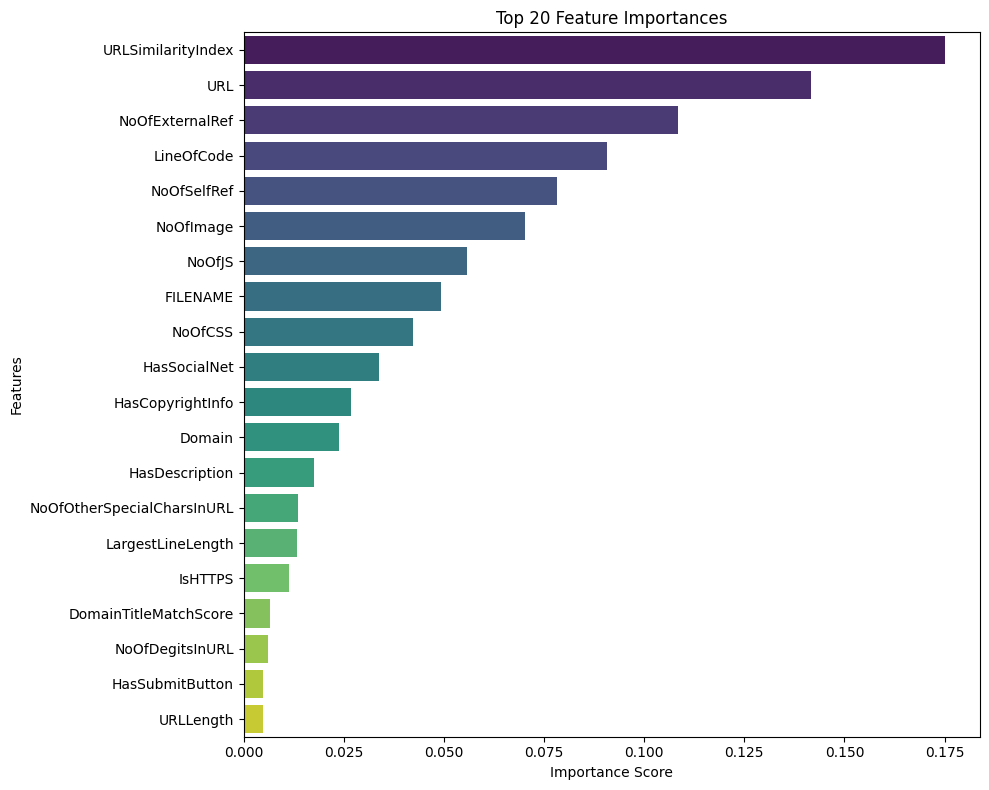

In [33]:
# Set the number of top features to display
top_n = 20

plt.figure(figsize=(10, 8))
sns.barplot(
    data=feature_importance_df.head(top_n),
    x='Importance', y='Feature', palette='viridis'
)
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(xTrain_encoded, yTrain)

yPred_xgb = xgb_model.predict(xTest_encoded)

print("XGBoost Accuracy:", accuracy_score(yTest, yPred_xgb))
print(classification_report(yTest, yPred_xgb))


XGBoost Accuracy: 0.9999363854195381
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20237
           1       1.00      1.00      1.00     26922

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



<Figure size 1200x800 with 0 Axes>

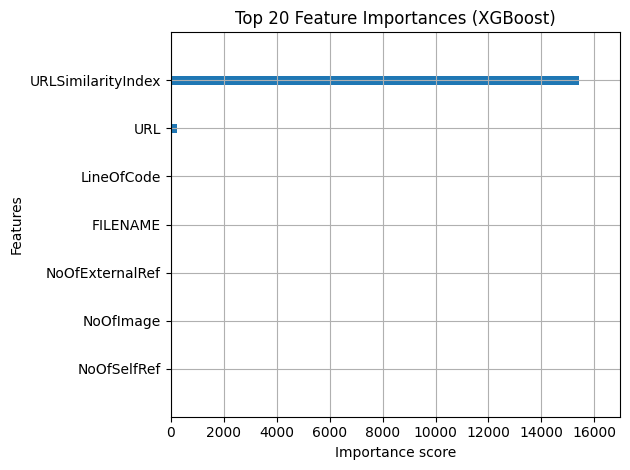

In [41]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot built-in feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=20, importance_type='gain', show_values=False)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


/var/folders/_n/sph109bs7bl30lzq6jnzzjtr0000gn/T/ipykernel_91333/3426817316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_feature_importance_df.head(20), x='Importance', y='Feature', palette='magma')


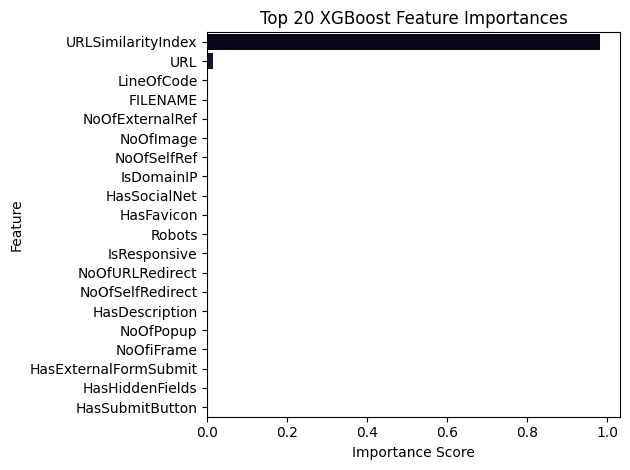

In [42]:
xgb_importances = xgb_model.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    'Feature': xTrain.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=xgb_feature_importance_df.head(20), x='Importance', y='Feature', palette='magma')
plt.title('Top 20 XGBoost Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import joblib

# Load sample data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
trained_model = RandomForestClassifier()
trained_model.fit(X_train, y_train)

# Save model
joblib.dump(trained_model, "final_model.pkl")



['final_model.pkl']